# MURA Dataset - Exploratory Data Analysis

### Import the required libraries

In [1]:
import os

import numpy as np
import cv2
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt


### Load the data files

In [2]:
base_dir = 'MURA-v1.1'
train_file = 'train_data_files.csv'
val_file = 'val_data_files.csv'

class_names = {1:'positive',0:'negative'}
xrays_cat = os.listdir(os.path.join(base_dir,'train'))

train_df = pd.read_csv(os.path.join(base_dir,train_file),usecols=['image_path','class_name','class_label','body_part','study_type'])
val_df = pd.read_csv(os.path.join(base_dir,val_file),usecols=['image_path','class_name','class_label','body_part','study_type'])


### See the first few samples of train and val dataframe

In [6]:
# thsi will print the first 3 samples
print ('Training dataframe')
print (train_df.head(3))
print ('-------------------------------------------------------------------------------')
print ('validation dataframe')
print (val_df.head(3))

Training dataframe
                                          image_path class_name  class_label  \
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...   positive            1   
1  MURA-v1.1/train/XR_SHOULDER/patient00001/study...   positive            1   
2  MURA-v1.1/train/XR_SHOULDER/patient00001/study...   positive            1   

  body_part study_type  
0  SHOULDER     study1  
1  SHOULDER     study1  
2  SHOULDER     study1  
-------------------------------------------------------------------------------
validation dataframe
                                          image_path class_name  class_label  \
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...   positive            1   
1  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...   positive            1   
2  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...   positive            1   

  body_part study_type  
0     WRIST     study1  
1     WRIST     study1  
2     WRIST     study1  


## EDA of Training Data

### Plot to see the count of positive and negative samples in the dataset

num of postive samples in training data:  14873
num of negative samples in training data:  21935


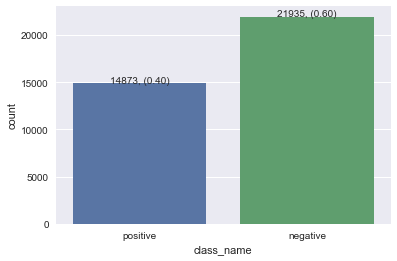

In [12]:
# Filter out the poistive and negative samples from the dataframe
positive_sample_tr = train_df[train_df['class_label']==1]
negative_sample_tr = train_df[train_df['class_label']==0]

num_pos_samples_tr = len(positive_sample_tr)
num_neg_samples_tr = len(negative_sample_tr)
print ('num of postive samples in training data: ', num_pos_samples_tr)
print ('num of negative samples in training data: ', num_neg_samples_tr)

#dist = train_df['labels'].value_counts
ax=sns.countplot(train_df['class_name'])
total = len(train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+10 ,
            '{}, ({:1.2f})'.format(height,(height/total)),
            ha="center")

### Visualize some positive samples from training data

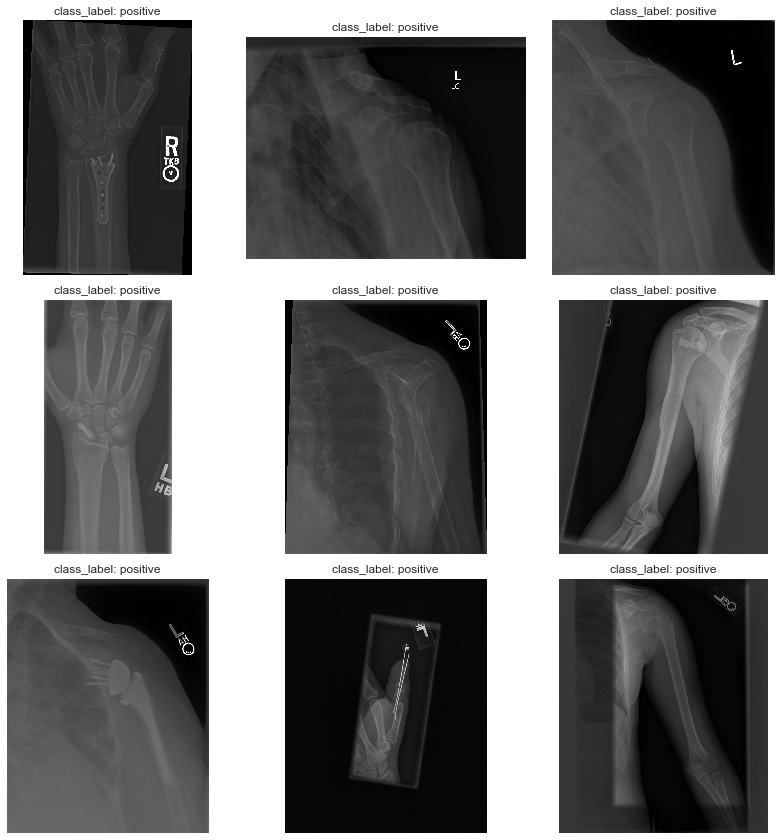

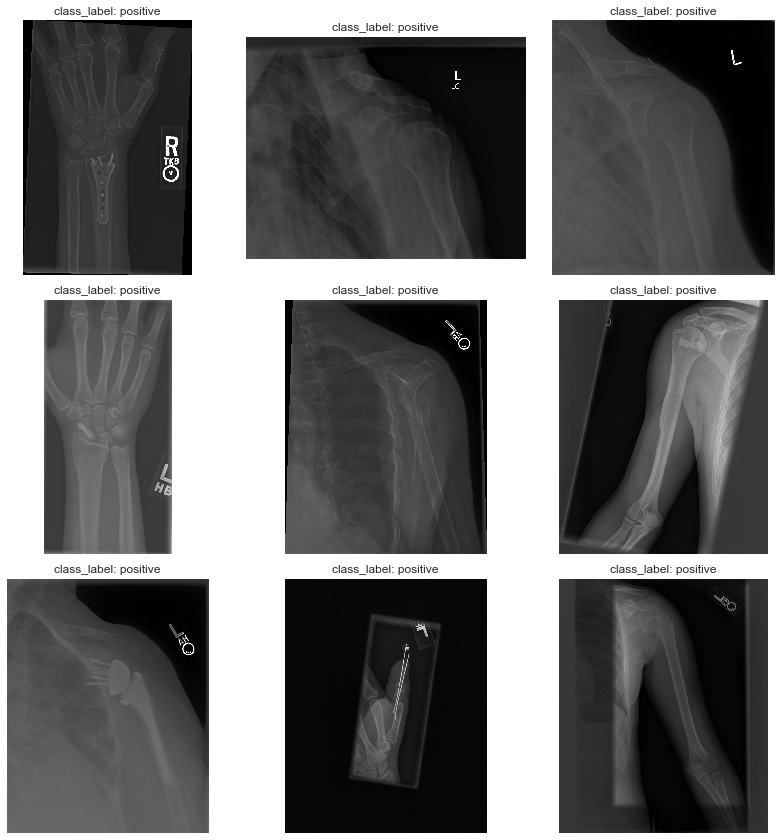

In [13]:
# read some of positive samples
fig = plt.figure(figsize=(12,12))
for i in range(9):
  ind =  random.randint(0,len(positive_sample_tr))
  img_sample = positive_sample_tr.iloc[ind,0]
  class_name = positive_sample_tr.iloc[ind,1]
  img = cv2.imread(img_sample)
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  img = img[:,:,::-1]
  plt.imshow(img, interpolation='none')
  plt.title("class_label: {}".format(class_name))
  plt.xticks([])
  plt.yticks([])
fig

### Visualize some negative samples from training data

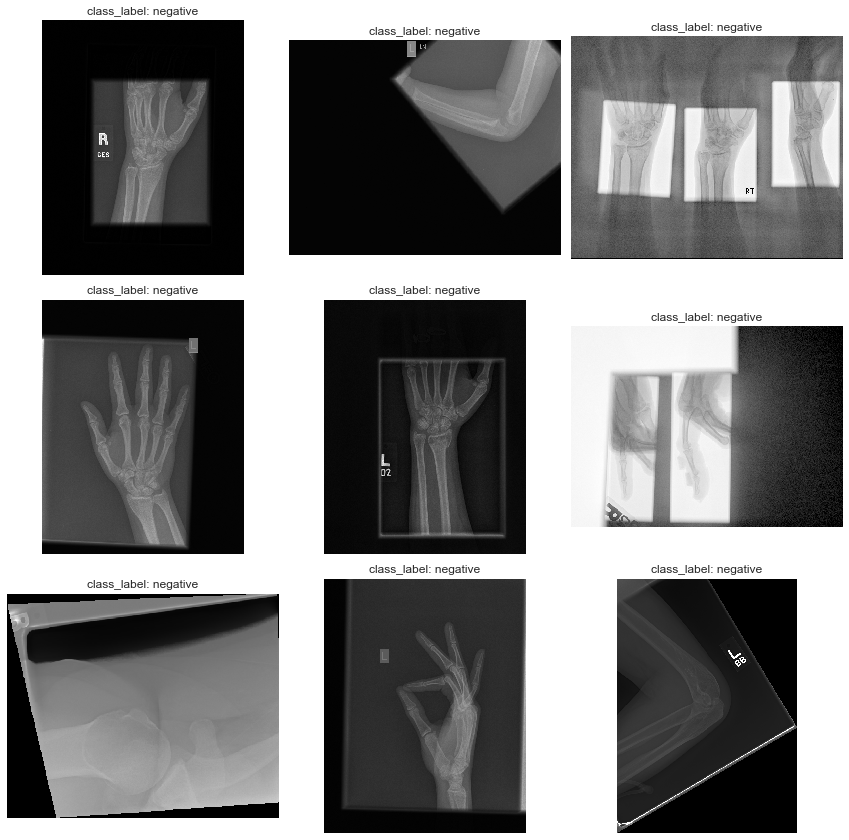

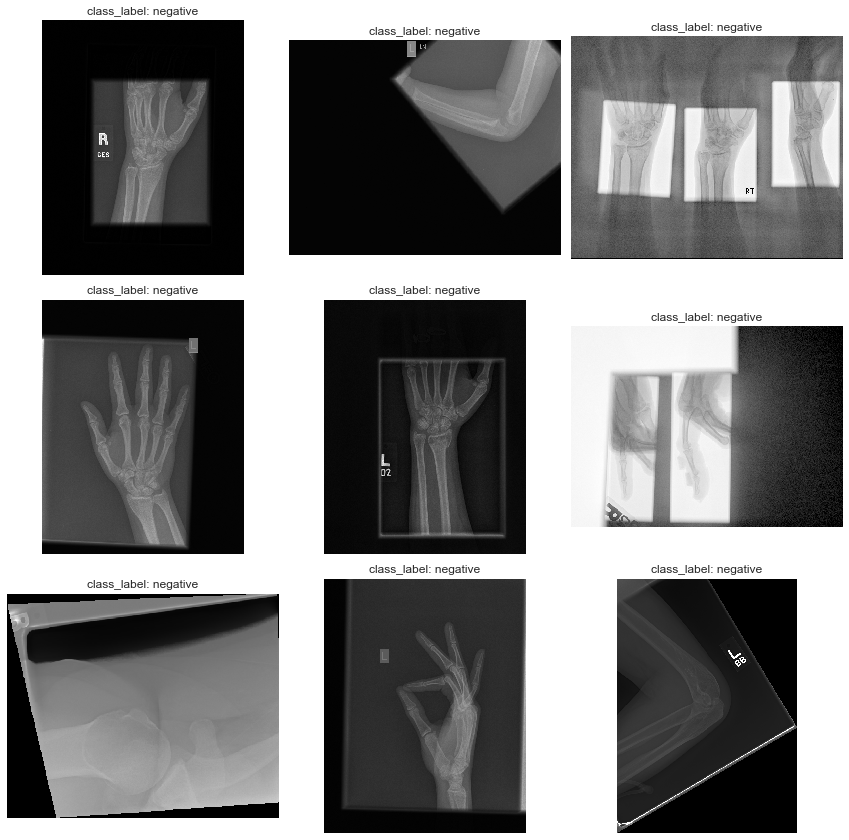

In [14]:
# read some of negative samples
fig = plt.figure(figsize=(12,12))
for i in range(9):
  ind =  random.randint(0,len(negative_sample_tr))
  img_sample = negative_sample_tr.iloc[ind,0]
  class_name = negative_sample_tr.iloc[ind,1]
  img = cv2.imread(img_sample)
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  img = img[:,:,::-1]
  plt.imshow(img, interpolation='none')
  plt.title("class_label: {}".format(class_name))
  plt.xticks([])
  plt.yticks([])
fig

### Plot to visualize the distribution of positive and negative samples over different body parts

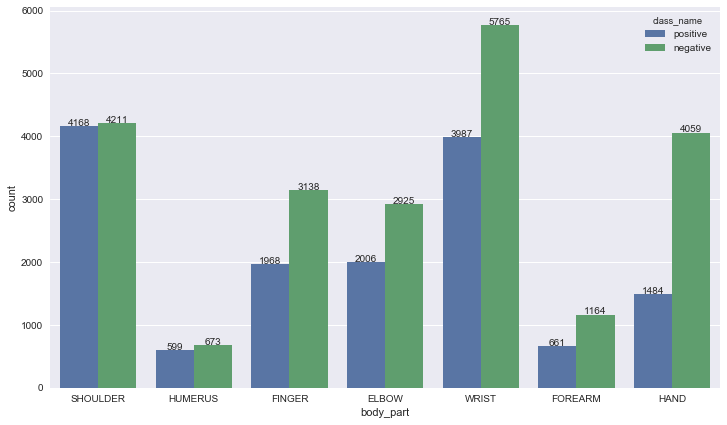

In [19]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=train_df,x='body_part',hue='class_name')
#total=len(plots[i-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{}'.format(height),
            ha="center")

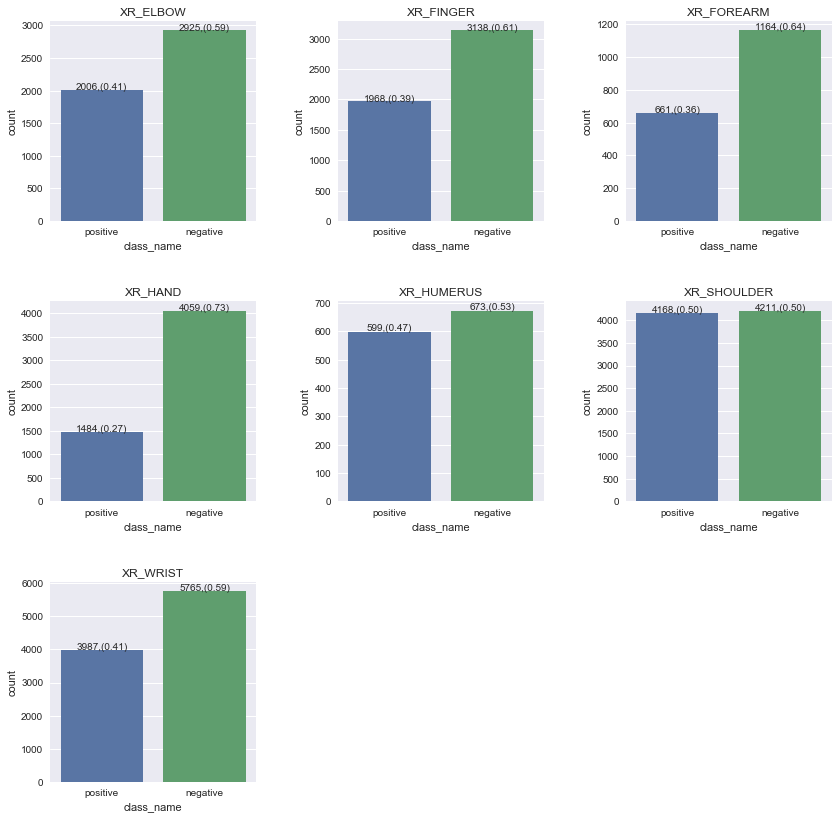

In [18]:
elbow_df_tr = train_df[train_df['body_part']=='ELBOW']
finger_df_tr = train_df[train_df['body_part']=='FINGER']
forearm_df_tr = train_df[train_df['body_part']=='FOREARM']
hand_df_tr = train_df[train_df['body_part']=='HAND']
humerus_df_tr = train_df[train_df['body_part']=='HUMERUS']
shoulder_df_tr = train_df[train_df['body_part']=='SHOULDER']
wrist_df_tr = train_df[train_df['body_part']=='WRIST']

plots = [elbow_df_tr,finger_df_tr,forearm_df_tr,hand_df_tr,humerus_df_tr,shoulder_df_tr,wrist_df_tr]

# plot with various axes scales
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,8):
    plt.subplot(3,3,i)
    ax = sns.countplot(x='class_name',data=plots[i-1])
    total=len(plots[i-1])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{},({:1.2f})'.format(height,(height/total)),
            ha="center")
#    plt.legend('neg','pos')
    plt.title(xrays_cat[i-1])
#    plt.grid(True)
#plt.legend('neg','pos')
plt.show()


### Plot to visualize the distribution of positive and negative samples over different study types

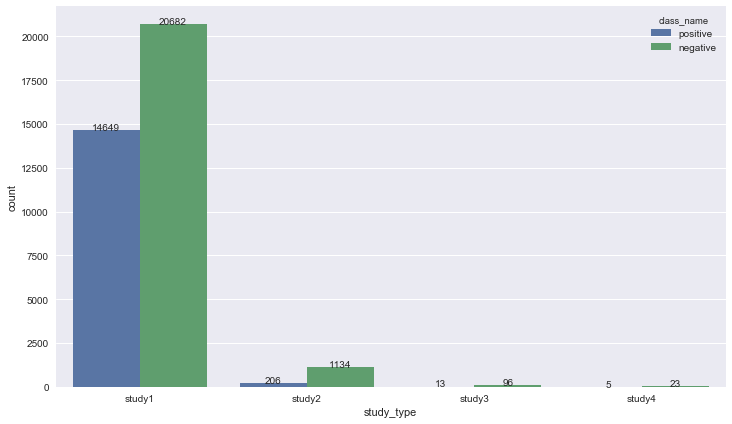

In [17]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=train_df,x='study_type',hue='class_name')
#total=len(plots[i-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{}'.format(height),
            ha="center")

## EDA of Validation Data

### Plot to see the count of positive and negative samples in the dataset

number of positive samples in validation data:  1530
number of negative samples in validation data:  1667


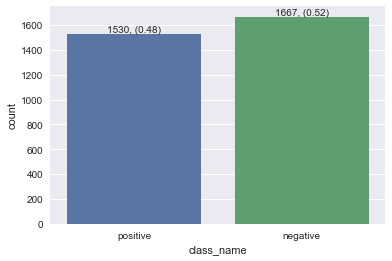

In [22]:
positive_sample_val = val_df[val_df['class_label']==1]
negative_sample_val = val_df[val_df['class_label']==0]

num_pos_samples_val = len(positive_sample_val)
num_neg_samples_val = len(negative_sample_val)
print ('number of positive samples in validation data: ',num_pos_samples_val)
print ('number of negative samples in validation data: ',num_neg_samples_val)

#dist = train_df['labels'].value_counts
ax = sns.countplot(val_df['class_name'])
total = len(val_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+10 ,
            '{}, ({:1.2f})'.format(height,(height/total)),
            ha="center")

### Read some positive samples from the validation data

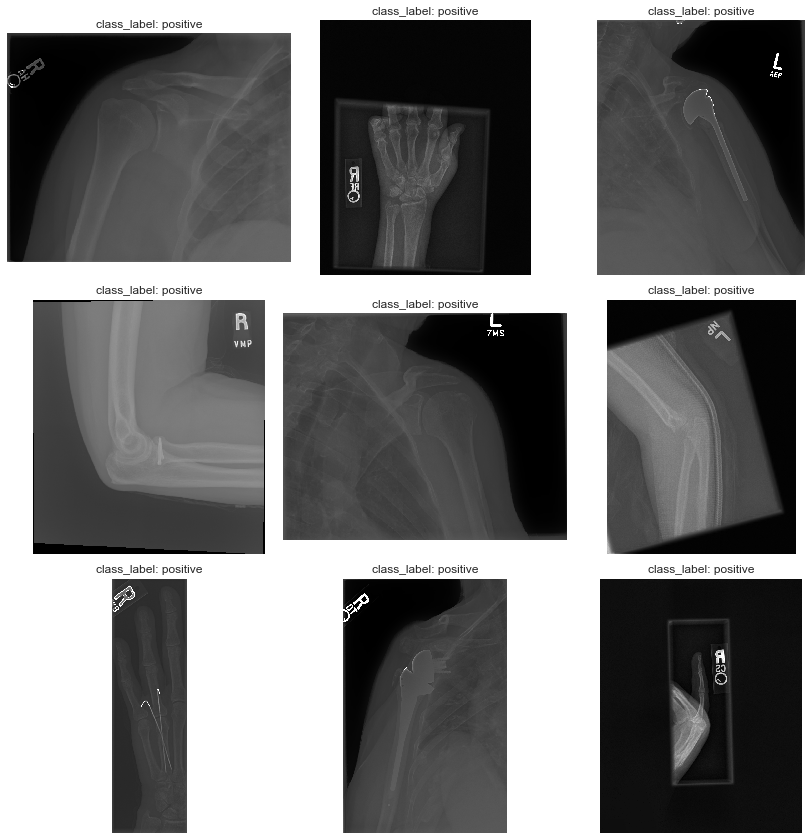

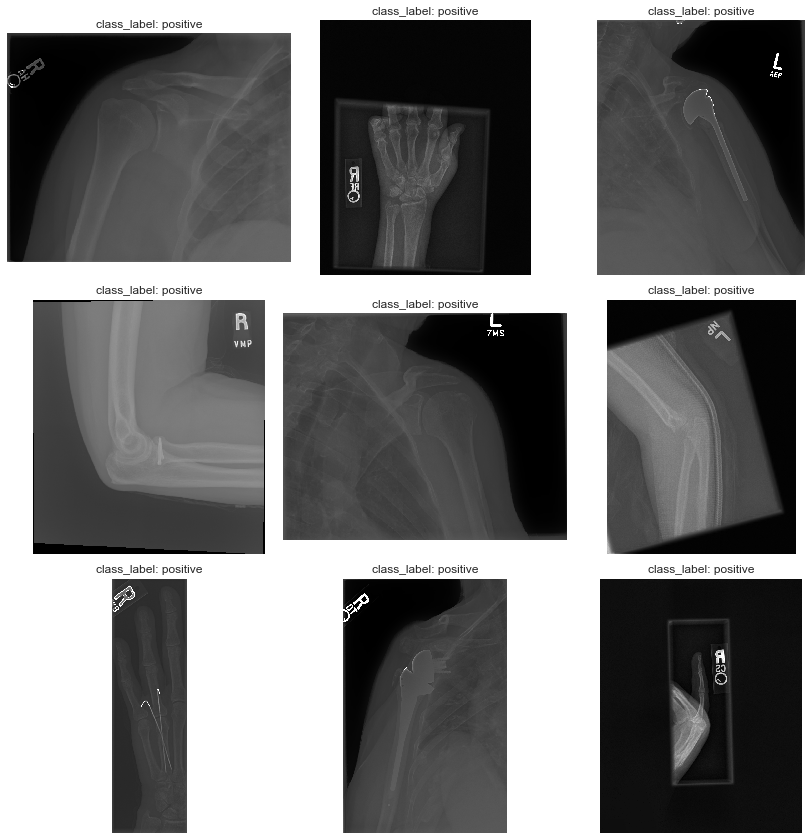

In [23]:
# read some of positive samples
fig = plt.figure(figsize=(12,12))
for i in range(9):
  ind =  random.randint(0,len(positive_sample_val))
  img_sample = positive_sample_val.iloc[ind,0]
  class_name = positive_sample_val.iloc[ind,1]
  img = cv2.imread(img_sample)
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  img = img[:,:,::-1]
  plt.imshow(img, interpolation='none')
  plt.title("class_label: {}".format(class_name))
  plt.xticks([])
  plt.yticks([])
fig

### Read some negative samples from the validation data

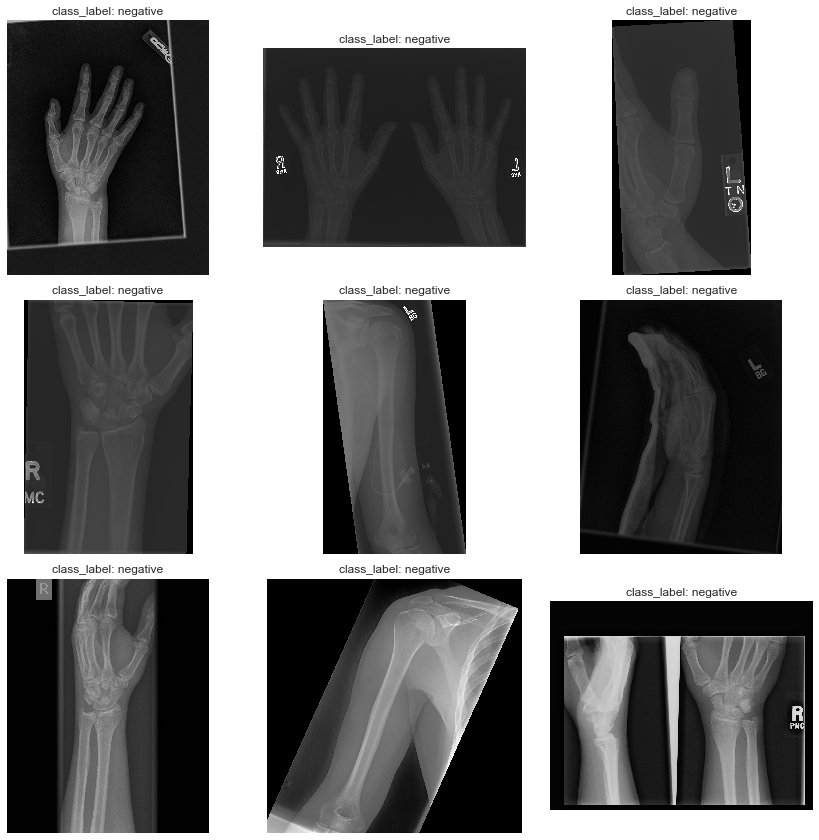

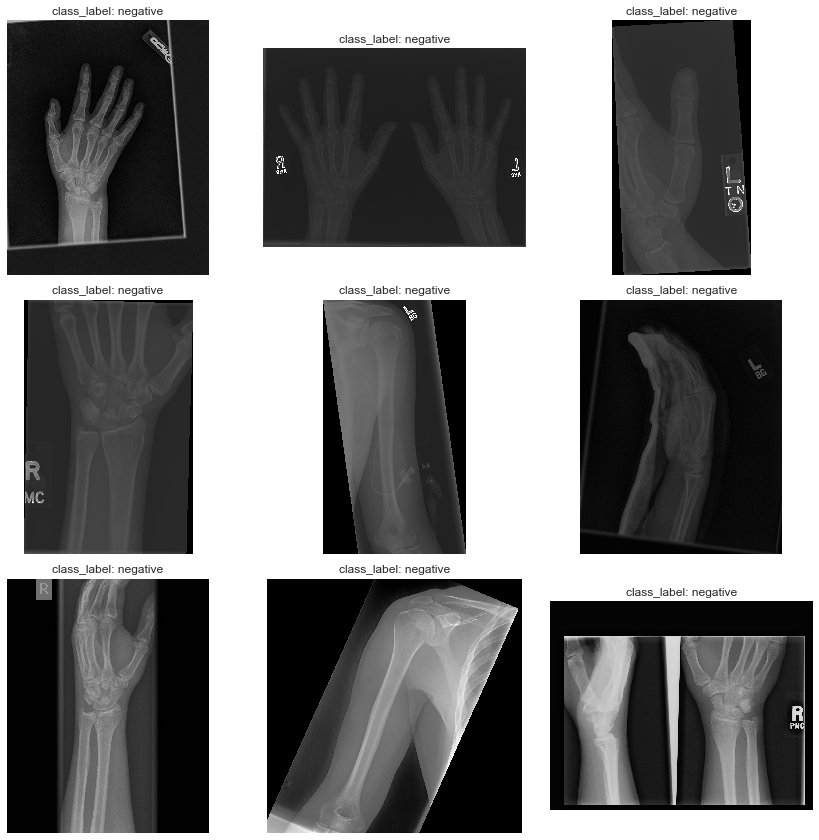

In [24]:
# read some of positive samples
fig = plt.figure(figsize=(12,12))
for i in range(9):
  ind =  random.randint(0,len(negative_sample_val))
  img_sample = negative_sample_val.iloc[ind,0]
  class_name = negative_sample_val.iloc[ind,1]
  img = cv2.imread(img_sample)
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  img = img[:,:,::-1]
  plt.imshow(img, interpolation='none')
  plt.title("class_label: {}".format(class_name))
  plt.xticks([])
  plt.yticks([])
fig

### Plot to visualize the distribution of positive and negative samples over different body parts

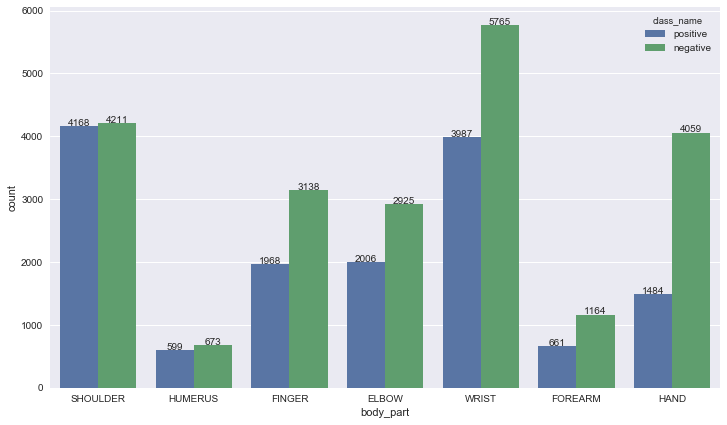

In [25]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=train_df,x='body_part',hue='class_name')
#total=len(plots[i-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{}'.format(height),
            ha="center")

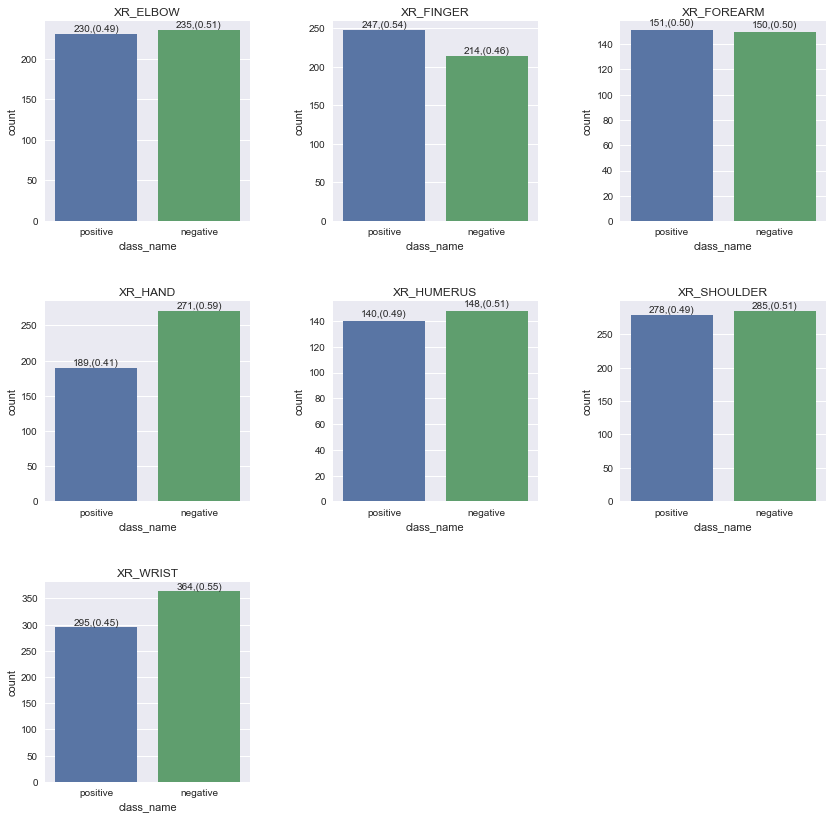

In [26]:
elbow_df_val = val_df[val_df['body_part']=='ELBOW']
finger_df_val = val_df[val_df['body_part']=='FINGER']
forearm_df_val = val_df[val_df['body_part']=='FOREARM']
hand_df_val = val_df[val_df['body_part']=='HAND']
humerus_df_val = val_df[val_df['body_part']=='HUMERUS']
shoulder_df_val = val_df[val_df['body_part']=='SHOULDER']
wrist_df_val = val_df[val_df['body_part']=='WRIST']

plots = [elbow_df_val,finger_df_val,forearm_df_val,hand_df_val,humerus_df_val,shoulder_df_val,wrist_df_val]

# plot with various axes scales
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,8):
    plt.subplot(3,3,i)
    ax = sns.countplot(x='class_name',data=plots[i-1])
    total=len(plots[i-1])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{},({:1.2f})'.format(height,(height/total)),
            ha="center")
#    plt.legend('neg','pos')
    plt.title(xrays_cat[i-1])
#    plt.grid(True)
#plt.legend('neg','pos')
plt.show()

### Plot to visualize the distribution of positive and negative samples over different study types

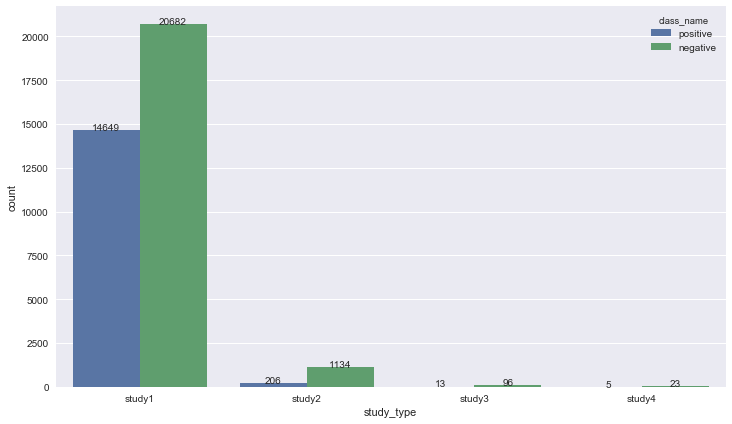

In [27]:
plt.figure(figsize=(12,7))
ax=sns.countplot(data=train_df,x='study_type',hue='class_name')
#total=len(plots[i-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3.5 ,
            '{}'.format(height),
            ha="center")